In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data

In [2]:
df = pd.read_csv('data_preprocessed_normalised_under.csv')

In [3]:
df.head()

Times Pregnant  Plasma Glucose Concentration   BMI  Age  Outcome
0               6                           117  28.7   30        0
1               1                            87  37.2   22        0
2               8                           110  27.8   58        0
3               1                           114  38.1   21        0
4               4                           132  28.0   63        0

Exploratory Data Analysis and Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Times Pregnant                400 non-null    int64  
 1   Plasma Glucose Concentration  400 non-null    int64  
 2   BMI                           400 non-null    float64
 3   Age                           400 non-null    int64  
 4   Outcome                       400 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 15.8 KB


In [5]:
df.describe()

Times Pregnant  Plasma Glucose Concentration        BMI         Age  \
count      400.000000                    400.000000  400.00000  400.000000   
mean         4.122500                    125.432500   32.74900   34.047500   
std          3.385432                     30.410565    6.45463   11.407698   
min          0.000000                     56.000000   18.20000   21.000000   
25%          1.000000                    102.000000   27.87500   25.000000   
50%          3.000000                    121.000000   32.80000   31.000000   
75%          7.000000                    146.000000   36.65000   42.000000   
max         13.000000                    198.000000   50.00000   66.000000   

          Outcome  
count  400.000000  
mean     0.500000  
std      0.500626  
min      0.000000  
25%      0.000000  
50%      0.500000  
75%      1.000000  
max      1.000000

In [6]:
df['Outcome'].value_counts()

0    200
1    200
Name: Outcome, dtype: int64

Train | Test Split and Scaling

In [7]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [10]:
scaler = StandardScaler()

In [11]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

Logistic Regression Model (Sklearn)

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
log_model = LogisticRegression()

In [14]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

Model Performance on Classification Tasks

In [15]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [16]:
y_pred = log_model.predict(scaled_X_test)

In [17]:
accuracy_score(y_test,y_pred)

0.75

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.84      0.78        31
           1       0.79      0.66      0.72        29

    accuracy                           0.75        60
   macro avg       0.76      0.75      0.75        60
weighted avg       0.76      0.75      0.75        60



In [19]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average=None)

array([0.7761194 , 0.71698113])

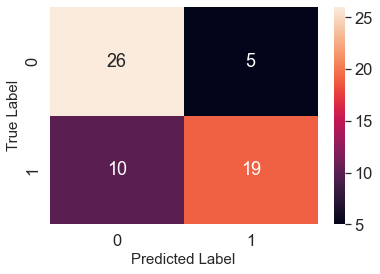

In [20]:
cm = confusion_matrix(y_test,y_pred)
sns.set(color_codes =True)
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted Label', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('True Label', fontsize = 15) # y-axis label with fontsize 15
plt.show()

In [21]:
X_train.iloc[0]

Times Pregnant                   11.0
Plasma Glucose Concentration    120.0
BMI                              42.3
Age                              48.0
Name: 388, dtype: float64

In [22]:
y_train.iloc[0]

1

In [23]:
# 0% probability of 0 class
# 100% probability of 1 class
log_model.predict_proba(X_train.iloc[0].values.reshape(1, -1))

array([[0., 1.]])

In [24]:
log_model.predict(X_train.iloc[0].values.reshape(1, -1))

array([1], dtype=int64)

Testing other methods such as by using best iterations

In [25]:
from sklearn import linear_model
train_score_list=[]
test_score_list=[]
arange=np.arange(1,100)
for each in range (1,len(arange)+1):
    log_iter = linear_model.LogisticRegression(random_state = 101,max_iter= each)
    log_iter.fit(scaled_X_train,y_train)
    train_score_list.append(log_iter.score(scaled_X_train,y_train))
    test_score_list.append(log_iter.score(scaled_X_test,y_test))    
print("Best accuracy(test) is {} with iteration n. = {}".format(np.max(test_score_list),test_score_list.index(np.max(test_score_list))+ 1))
print("Best accuracy(train) is {} with iteration n. = {}".format(np.max(train_score_list),train_score_list.index(np.max(train_score_list))+ 1))

C:\Users\windb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\windb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best accuracy(test) is 0.7666666666666667 with iteration n. = 1
Best accuracy(train) is 0.7176470588235294 with iteration n. = 1


In [26]:
best_max_iter_parameter = test_score_list.index(np.max(test_score_list))+ 1
log_iter_final = linear_model.LogisticRegression(random_state = 101,max_iter= best_max_iter_parameter)
log_iter_final.fit(scaled_X_train,y_train)
y_predicted = log_iter_final.predict(scaled_X_test)
y_true = y_test

print("Score: ",log_iter_final.score(scaled_X_train,y_train))

Score:  0.7176470588235294


C:\Users\windb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
accuracy_score(y_true,y_predicted)

0.7666666666666667

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_true,y_predicted))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78        31
           1       0.78      0.72      0.75        29

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60



In [29]:
from sklearn.metrics import f1_score
f1_score(y_true, y_predicted, average=None)

array([0.78125, 0.75   ])

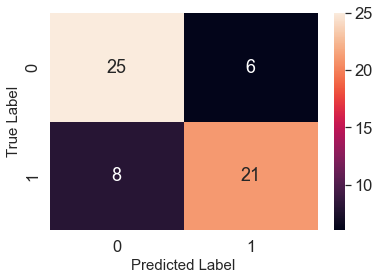

In [30]:
cm = confusion_matrix(y_true,y_predicted)
sns.set(color_codes =True)
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted Label', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('True Label', fontsize = 15) # y-axis label with fontsize 15
plt.show()

Logistic Regression gridsearch manual

In [31]:
##https://gist.github.com/accessnash/c329252828d9cc7eb5bffdb5fc2ce28d

In [32]:
c_space = np.logspace(-5, 8, 15)
param_grid = {'C':c_space, 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}

In [33]:
logreg = LogisticRegression()

In [34]:
from sklearn.model_selection import GridSearchCV
log_grid = GridSearchCV(logreg, param_grid, cv=5)

In [35]:
log_grid.fit(scaled_X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']})

In [36]:
print("Tuned Logistic Regression Parameters: {}".format(log_grid.best_params_)) 
print("Best score is {}".format(log_grid.best_score_))

Tuned Logistic Regression Parameters: {'C': 1e-05, 'penalty': 'l2', 'solver': 'liblinear'}
Best score is 0.7058823529411764


In [37]:
y_predict_grid = log_grid.predict(scaled_X_test)

In [38]:
accuracy_score(y_test,y_predict_grid)

0.7666666666666667

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_true,y_predict_grid))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78        31
           1       0.78      0.72      0.75        29

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60



In [40]:
from sklearn.metrics import f1_score
f1_score(y_test, y_predict_grid, average=None)

array([0.78125, 0.75   ])

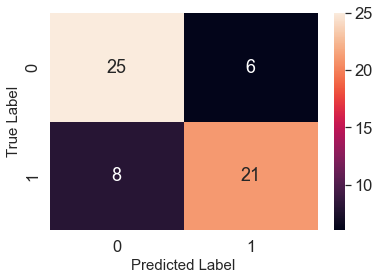

In [41]:
cm = confusion_matrix(y_test,y_predict_grid)
sns.set(color_codes =True)
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted Label', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('True Label', fontsize = 15) # y-axis label with fontsize 15
plt.show()

Logistic regression CV

In [42]:
from sklearn.linear_model import LogisticRegressionCV
Log_cv = LogisticRegressionCV(cv=5, random_state=101,solver= 'liblinear').fit(scaled_X_test, y_test)

In [43]:
y_predicted_log = Log_cv.predict(scaled_X_test)

In [44]:
accuracy_score(y_test,y_predicted_log)

0.8333333333333334

In [45]:
print(classification_report(y_test,y_predicted_log))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84        31
           1       0.85      0.79      0.82        29

    accuracy                           0.83        60
   macro avg       0.84      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60



In [46]:
from sklearn.metrics import f1_score
f1_score(y_test, y_predicted_log, average=None)

array([0.84375   , 0.82142857])

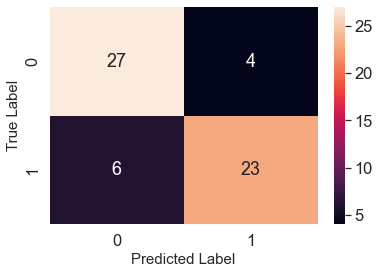

In [47]:
cm = confusion_matrix(y_test,y_predicted_log)
sns.set(color_codes =True)
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted Label', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('True Label', fontsize = 15) # y-axis label with fontsize 15
plt.show()

Evaluating Curves and AUC

In [48]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve

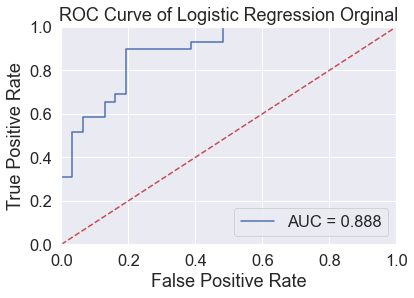

In [54]:
#original method
log= LogisticRegression()
log.fit(scaled_X_train,y_train)
y_scores=log.predict_proba(scaled_X_test)
fpr,tpr,threshold = roc_curve(y_test,y_scores[:,1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr,'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Logistic Regression Orginal')
plt.show()

C:\Users\windb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


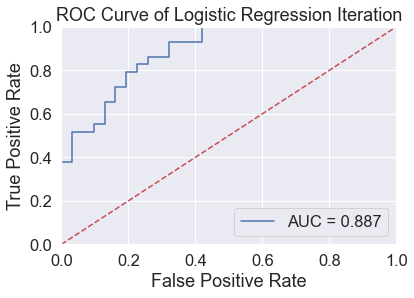

In [55]:
log_iter_final = linear_model.LogisticRegression(random_state = 101,max_iter= best_max_iter_parameter)
log_iter_final.fit(scaled_X_train,y_train)
y_predicted = log_iter_final.predict_proba(scaled_X_test)
fpr,tpr,threshold = roc_curve(y_test,y_predicted[:,1])
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr,'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Logistic Regression Iteration')
plt.show()

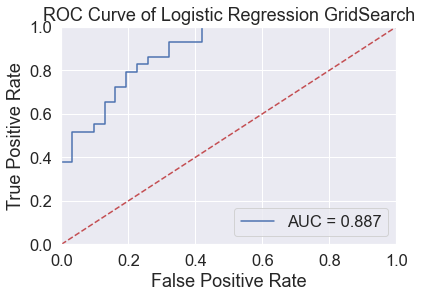

In [51]:
y_predicted_log = log_grid.predict_proba(scaled_X_test)
fpr,tpr,threshold = roc_curve(y_test,y_predicted_log[:,1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr,'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Logistic Regression GridSearch')
plt.show()

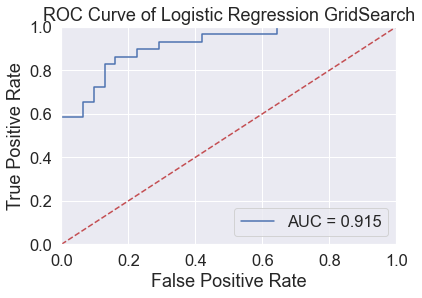

In [52]:
y_predicted_log = Log_cv.predict_proba(scaled_X_test)
fpr,tpr,threshold = roc_curve(y_test,y_predicted_log[:,1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr,'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Logistic Regression GridSearch')
plt.show()

In [ ]:
Thus Gridsearch is the best model in terms of roc, f1 and predict

Testing prediction accuracy

Saving data to GUI

In [53]:
import pickle
log_model = pickle.dump(log, open('log_grid.h5', 'wb'))